In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf



In [65]:
data= pd.read_csv("data/sales.csv", sep = ",")
data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [66]:
data.describe()

,sales
count,366.000000
mean,524.963968
std,275.089698
min,53.803211
25%,290.186822
50%,520.699468
75%,763.289263
max,1000.482785


Formatting the data string

In [67]:
data["date"] = pd.to_datetime(data.date)
data = data.set_index("date")
data = data["sales"]
data.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

Plot the Time Serie

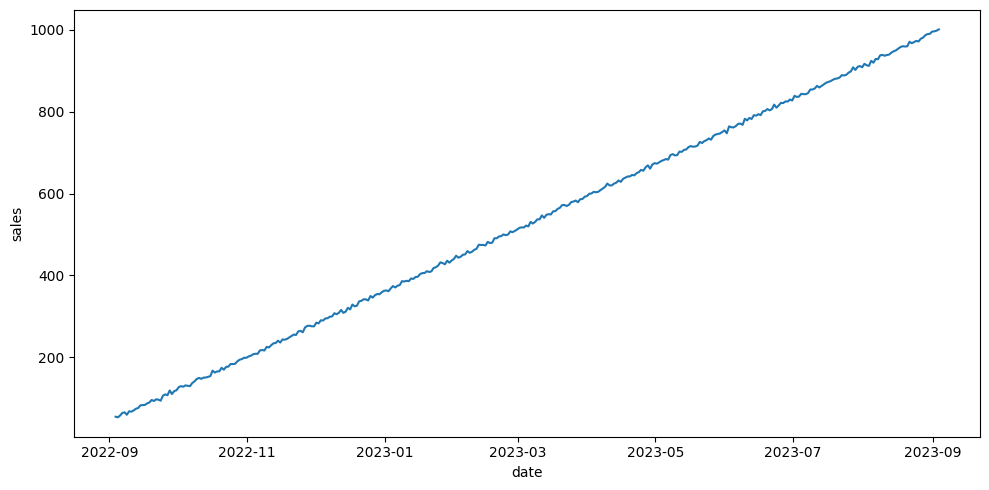

In [68]:
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = data)
plt.tight_layout()
plt.show()

Step 2: Construct & Analyze. 
Trend, Seasonality, Variability, Outliers, Inflection poindata

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data, period = 12)
decomposition

In [70]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(data)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

Trend - appears growing

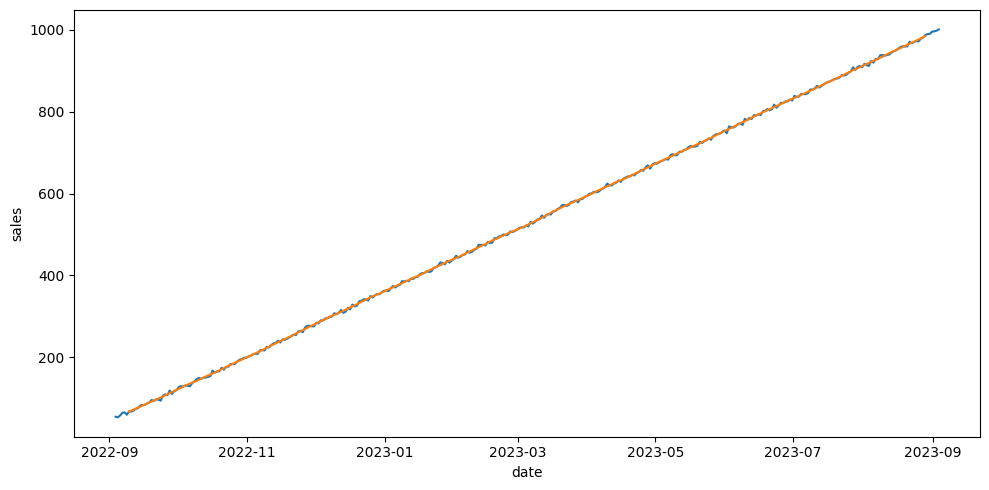

In [71]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = data)
sns.lineplot(data = trend)
plt.tight_layout()

plt.show()

Seasonality - appears flat

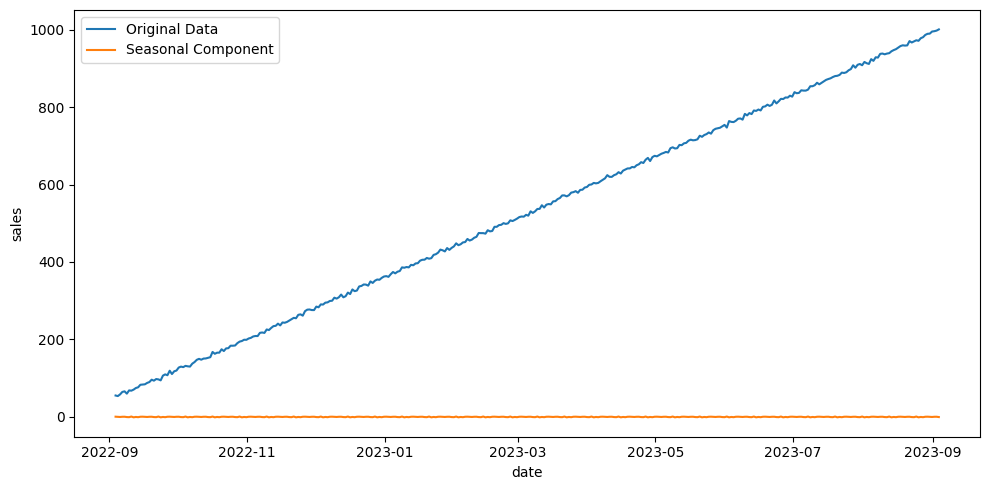

In [72]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize=(10, 5))

sns.lineplot(data=data, label="Original Data")
sns.lineplot(data=seasonal, label="Seasonal Component")

plt.legend()  
plt.tight_layout()
plt.show()


Evaluate the stationarity with Dickey-Fuller test. P-value proves the serie is non-stationary.

In [73]:
def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(data)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

Variability 

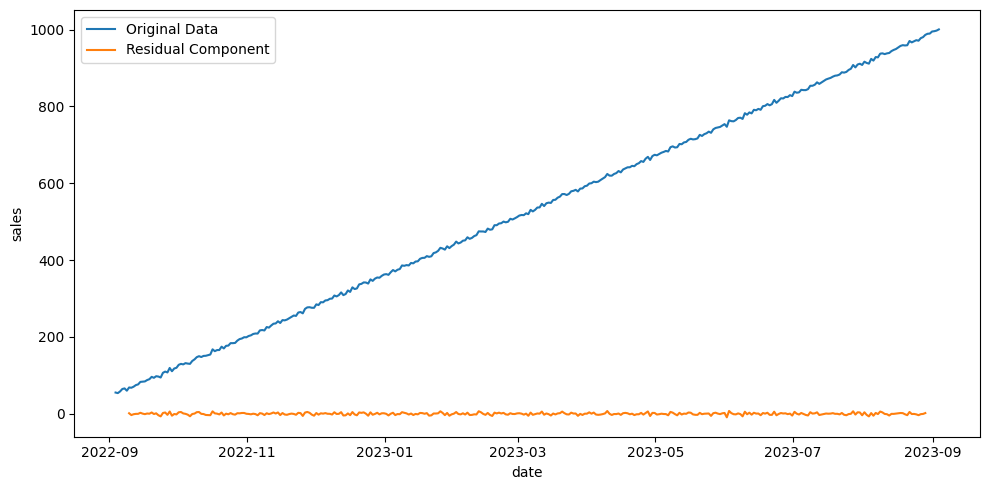

In [74]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data=data, label="Original Data")
sns.lineplot(data=residual, label="Residual Component")

plt.legend() 
plt.tight_layout()

plt.show()

Autocorrelation analysis

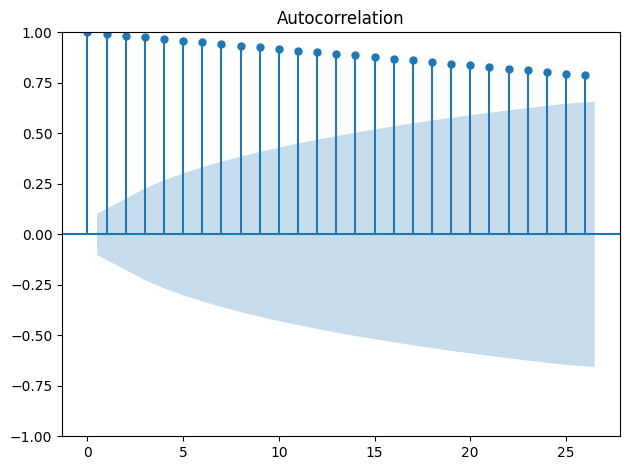

In [75]:
plot_acf(data)

plt.tight_layout()

plt.show()


Outliers - none observed

Inflection poindata

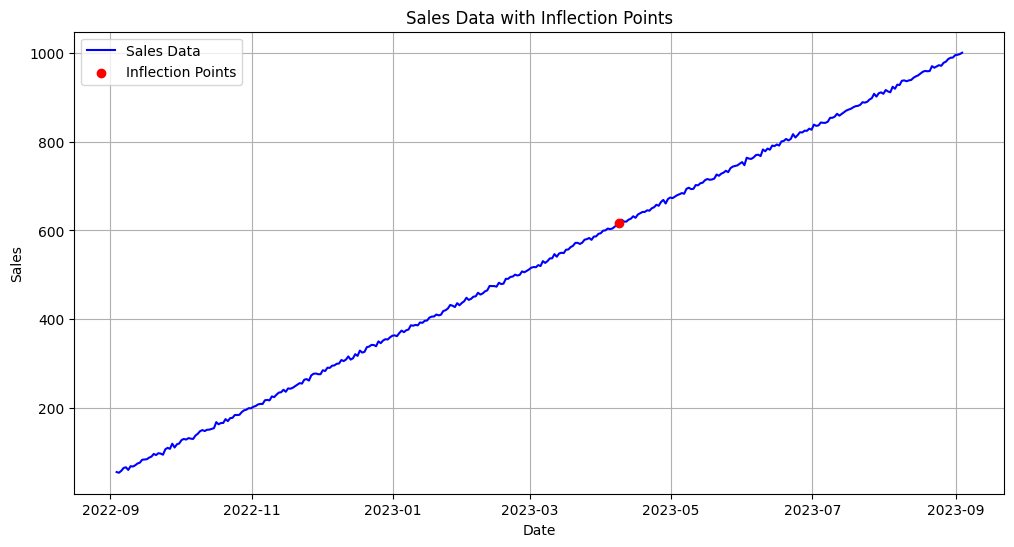

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Load your data
data = pd.read_csv("data/sales.csv", sep=",")
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

data['sales_diff'] = data['sales'].diff()  # First derivative
data['sales_diff2'] = data['sales_diff'].diff()  # Second derivative

inflection_points = data.loc[data['sales_diff2'].abs() < 0.01]

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['sales'], label='Sales Data', color='blue')
plt.scatter(inflection_points.index, inflection_points['sales'], color='red', label='Inflection Points', zorder=5)
plt.title('Sales Data with Inflection Points')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


Step 3: ARIMA

In [77]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['sales'], order=(1, 1, 1))
model_fit = model.fit()

# Print the summary
print(model_fit.summary())


/workspaces/alternative-time-series-project_if/ifenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspaces/alternative-time-series-project_if/ifenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspaces/alternative-time-series-project_if/ifenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1049.226
Date:                Fri, 04 Oct 2024   AIC                           2104.453
Time:                        22:20:50   BIC                           2116.153
Sample:                    09-03-2022   HQIC                          2109.103
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001   1194.486      0.000       0.998       1.002
ma.L1         -0.9996      0.679     -1.471      0.141      -2.331       0.332
sigma2        18.1401     12.421      1.460      0.1

/workspaces/alternative-time-series-project_if/ifenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Step 4: Prediction

In [78]:
data['forecast'] = model_fit.predict(start=0, end=len(data)-1)




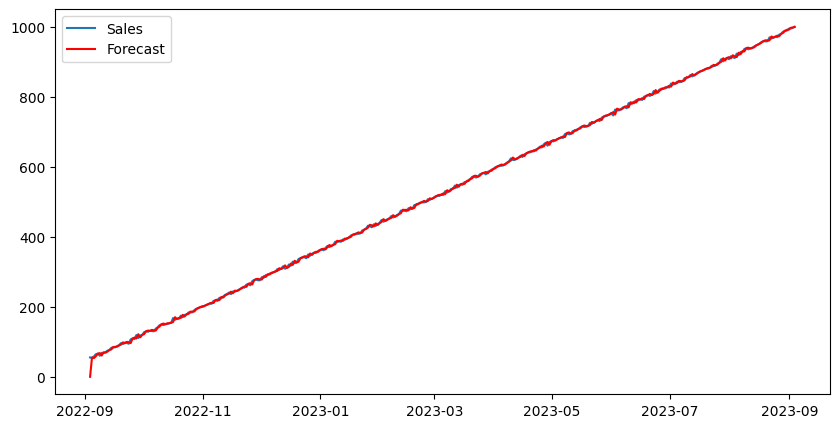

In [79]:
plt.figure(figsize=(10, 5))
plt.plot(data['sales'], label='Sales')
plt.plot(data['forecast'], label='Forecast', color='red')
plt.legend()
plt.show()